# Principal Component Analysis with Cancer Data

In [37]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [38]:
colnames = ['sample_code_number', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
cancer_df = pd.read_csv('breast-cancer-wisconsin.data.txt', sep=",", header=None, names = colnames)
cancer_df.head(10)

,sample_code_number,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [39]:
  # Id columns is to identify rows hence can be skipped in analysis
cancer_df.drop(['sample_code_number'], axis =1, inplace = True)
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
cancer_df

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [40]:
cancer_df.dtypes

Clump_thickness                 int64
Uniformity_cell_size            int64
Uniformity_cell_shape           int64
Marginal_Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [41]:
cancer_df.shape

(699, 10)

In [42]:
cancer_df.describe()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].median())

In [30]:
cancer_df.dtypes

Clump_thickness                 int64
Uniformity_cell_size            int64
Uniformity_cell_shape           int64
Marginal_Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [31]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [32]:
cancer_df.dtypes

Clump_thickness                int64
Uniformity_cell_size           int64
Uniformity_cell_shape          int64
Marginal_Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [43]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].replace('?', np.NaN)

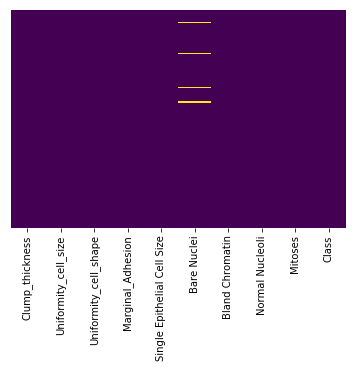

In [44]:
sns.heatmap(cancer_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
cancer_df = cancer_df.replace(0,np.NaN)
print(cancer_df.isnull().sum())


Clump_thickness                 0
Uniformity_cell_size            0
Uniformity_cell_shape           0
Marginal_Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [46]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df = cancer_df.replace(np.NaN,cancer_df.iloc[:,5].median())

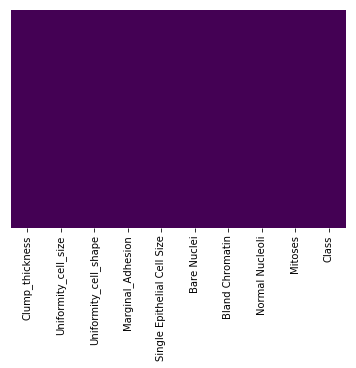

In [47]:
sns.heatmap(cancer_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [48]:
# Check for correlation of variable
cancer_df.corr()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


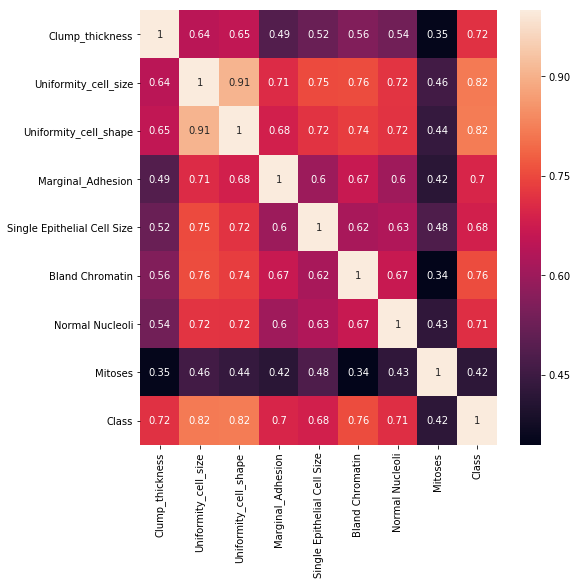

In [49]:
plt.figure(figsize=(8, 8))
sns.heatmap(cancer_df.corr(), annot = True)

In [50]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

TypeError: 1.0 is not a string

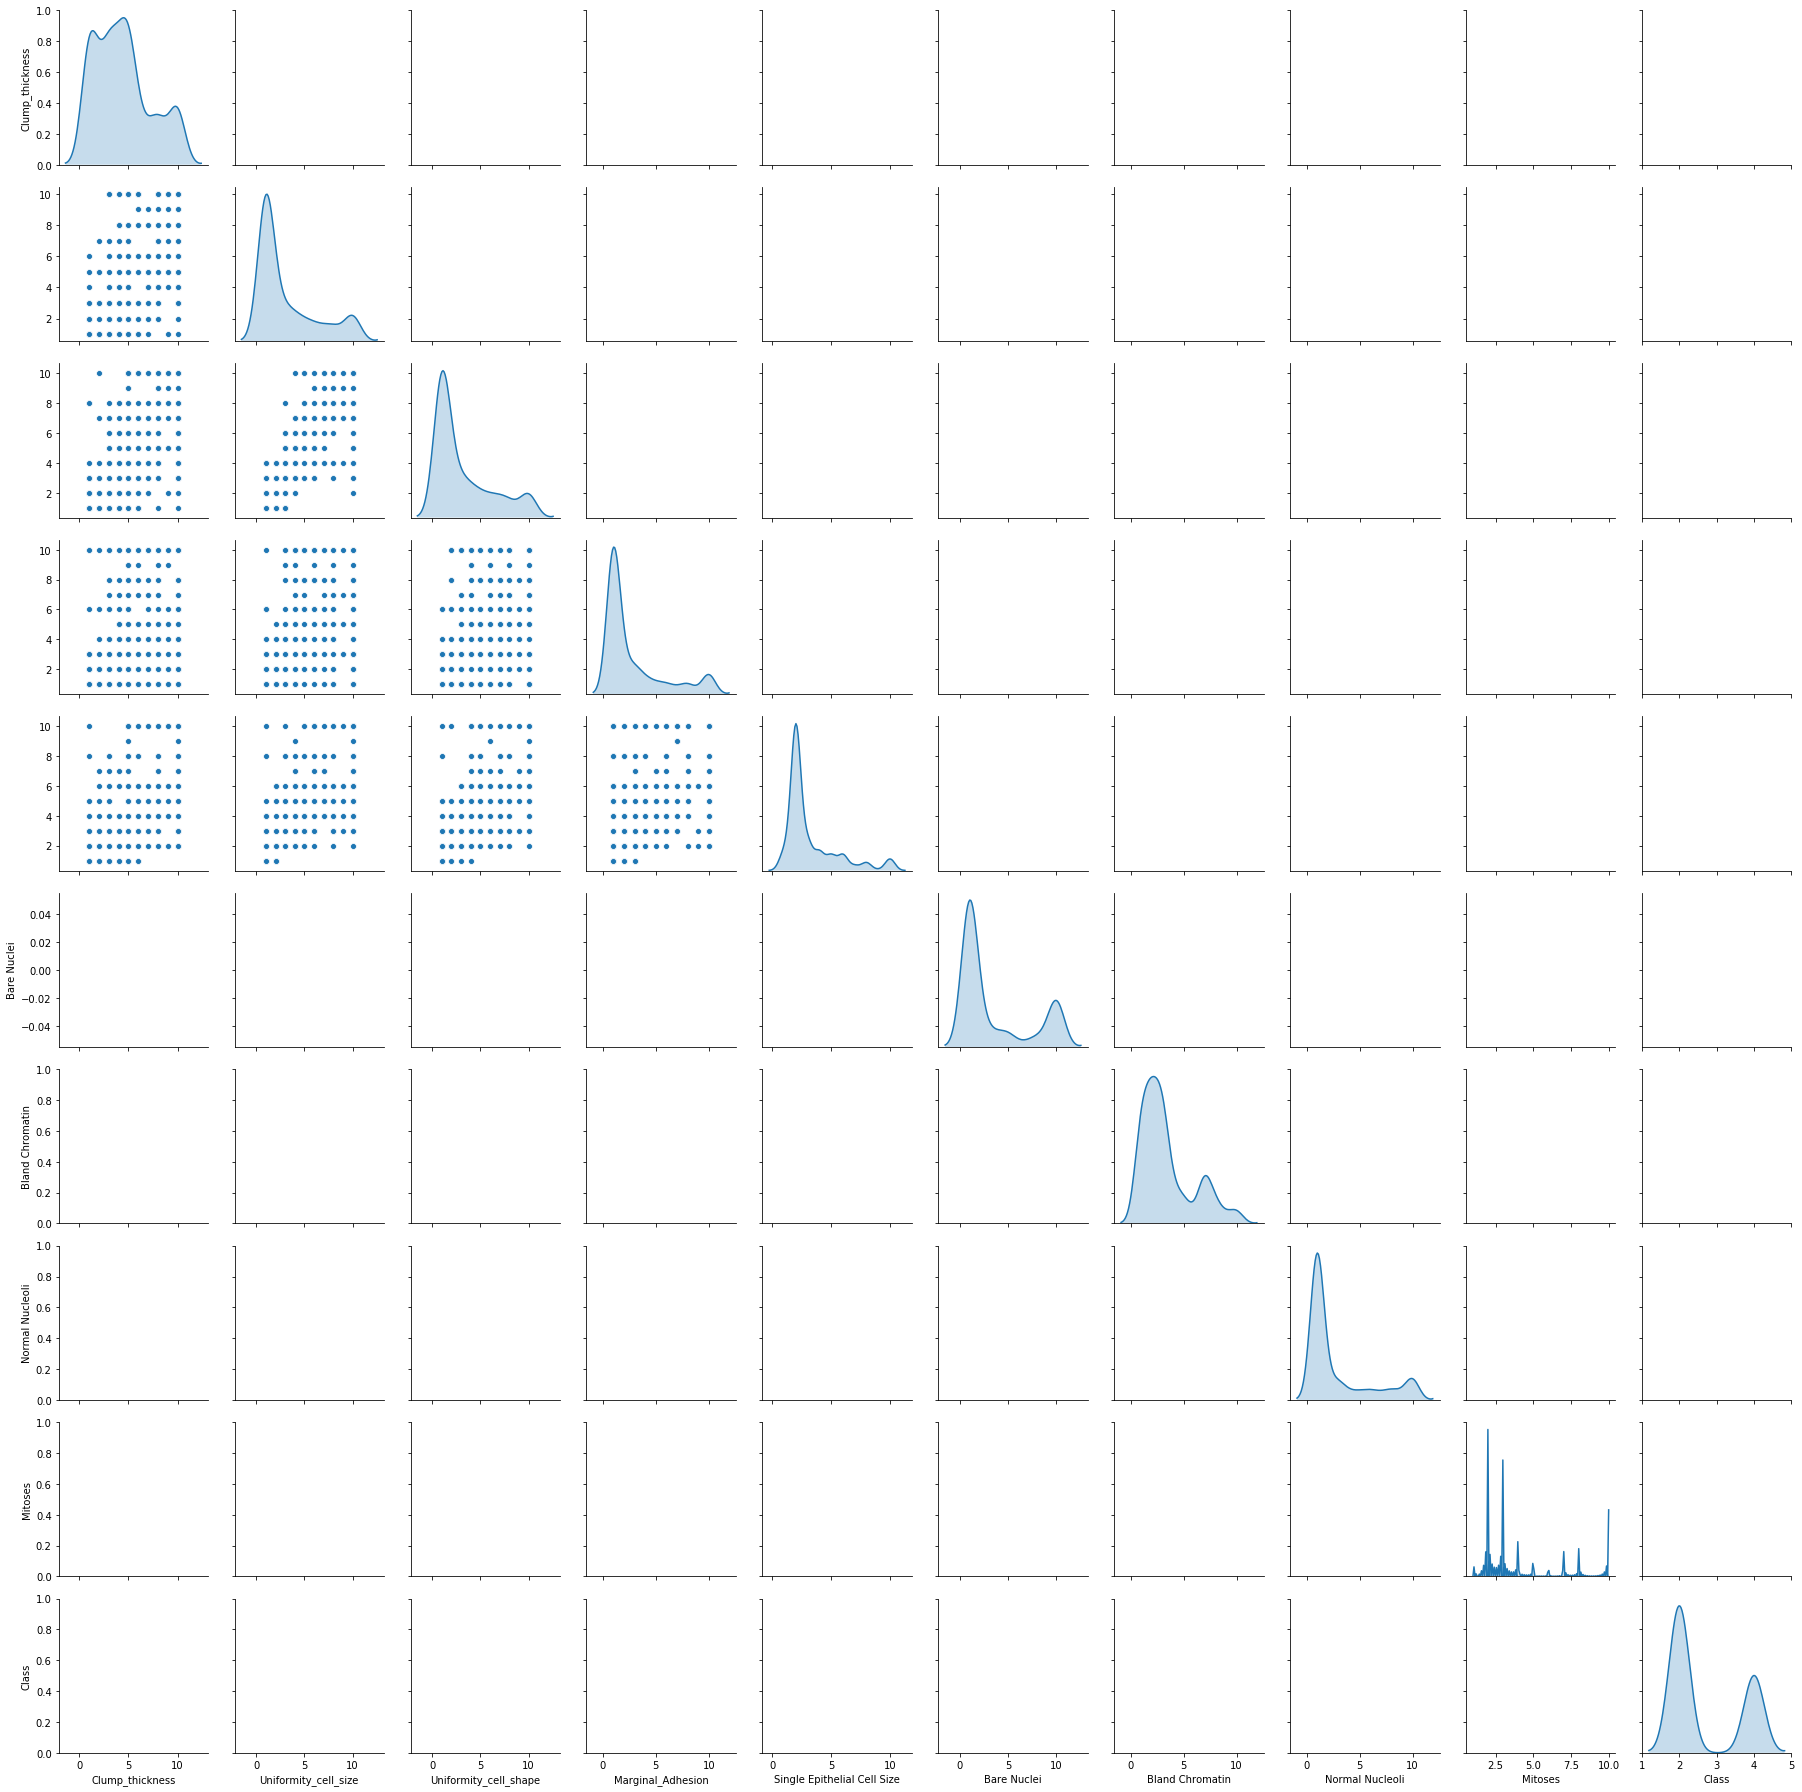

In [51]:
#Let us check for pair plots
sns.pairplot(cancer_df, diag_kind='kde') 

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

KeyError: "['Bare Nuclei'] not in index"

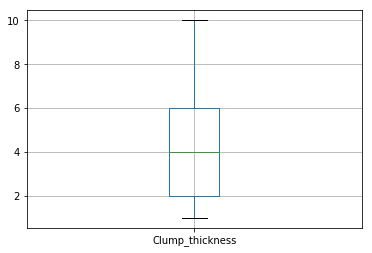

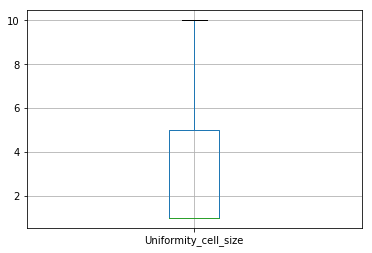

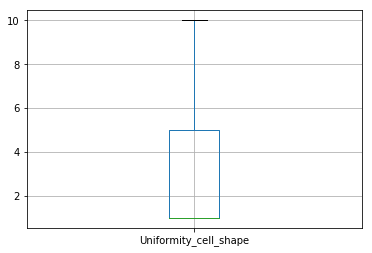

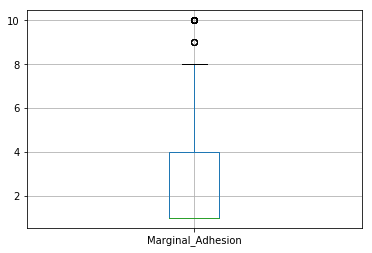

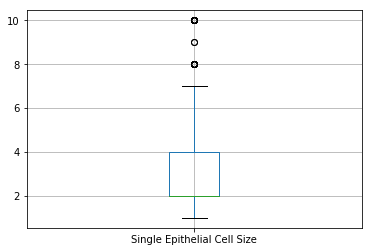

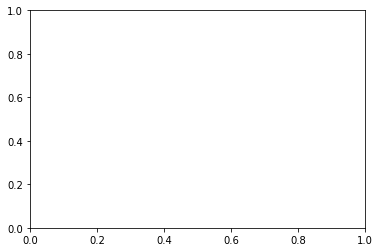

In [52]:
import matplotlib.pyplot as plt

for column in cancer_df:
    plt.figure()
    cancer_df.boxplot([column])

In [53]:
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Clump_thickness                4.0
Uniformity_cell_size           4.0
Uniformity_cell_shape          4.0
Marginal_Adhesion              3.0
Single Epithelial Cell Size    2.0
Bland Chromatin                3.0
Normal Nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


In [22]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [54]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = cancer_df[cancer_df.columns[1:-1]]
y = cancer_df["Class"]
# remove target variable column before PCA as PCA does dimensionality reduction of independent variables only.
cancer_df.drop(['Class'], axis =1, inplace = True)

In [55]:
# PCA
# Step 1 - Create covariance matrix
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00143266 0.90818117 0.70659267 0.75287621 0.68765657 0.75680368
  0.72390044 0.4593503 ]
 [0.90818117 1.00143266 0.68405782 0.72069948 0.70848734 0.73700282
  0.72047704 0.43953974]
 [0.70659267 0.68405782 1.00143266 0.60045809 0.66792658 0.66767051
  0.60421681 0.41823111]
 [0.75287621 0.72069948 0.60045809 1.00143266 0.5845377  0.61698451
  0.62978166 0.47978787]
 [0.68765657 0.70848734 0.66792658 0.5845377  1.00143266 0.67518063
  0.5756016  0.34288766]
 [0.75680368 0.73700282 0.66767051 0.61698451 0.67518063 1.00143266
  0.66683179 0.34466258]
 [0.72390044 0.72047704 0.60421681 0.62978166 0.5756016  0.66683179
  1.00143266 0.42894941]
 [0.4593503  0.43953974 0.41823111 0.47978787 0.34288766 0.34466258
  0.42894941 1.00143266]]


C:\Users\SRM\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SRM\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [56]:
# Step 2- Get eigen values and eigen vector

In [57]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.39847994 -0.062414   -0.73601628 -0.20398524 -0.14132791  0.43266205
  -0.21598654  0.01296432]
 [-0.39370776 -0.09340305  0.66494297 -0.18506849 -0.12668727  0.55098835
  -0.1426921   0.14096705]
 [-0.35272931 -0.08531517  0.04692692  0.5248911   0.12334922  0.09451857
   0.08350668 -0.7479762 ]
 [-0.35462838  0.14260532  0.0679272  -0.35935778 -0.63861856 -0.46940404
   0.18406897 -0.24102929]
 [-0.34696126 -0.25494788 -0.07379637  0.52742009 -0.18497738 -0.10368618
   0.41414996  0.56081545]
 [-0.36327475 -0.25577122  0.0587669   0.02887731  0.26700296 -0.50964666
  -0.6712839   0.1291229 ]
 [-0.35310871  0.00382172 -0.01896902 -0.43307607  0.65074018 -0.09716218
   0.50431126  0.01232102]
 [-0.24288322  0.91067748  0.00744054  0.23006578  0.10935296 -0.00323347
  -0.12514757  0.1762334 ]]

 Eigen Values 
%s [5.40438223 0.76982562 0.0889498  0.46721886 0.38250129 0.27328063
 0.2960949  0.32920798]


In [58]:
# Eigen Values (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.404382234667025, array([-0.39847994, -0.39370776, -0.35272931, -0.35462838, -0.34696126,
       -0.36327475, -0.35310871, -0.24288322])), (0.7698256196395442, array([-0.062414  , -0.09340305, -0.08531517,  0.14260532, -0.25494788,
       -0.25577122,  0.00382172,  0.91067748])), (0.46721886054140555, array([-0.20398524, -0.18506849,  0.5248911 , -0.35935778,  0.52742009,
        0.02887731, -0.43307607,  0.23006578])), (0.3825012897552977, array([-0.14132791, -0.12668727,  0.12334922, -0.63861856, -0.18497738,
        0.26700296,  0.65074018,  0.10935296])), (0.3292079816888985, array([ 0.01296432,  0.14096705, -0.7479762 , -0.24102929,  0.56081545,
        0.1291229 ,  0.01232102,  0.1762334 ])), (0.2960948984112921, array([-0.21598654, -0.1426921 ,  0.08350668,  0.18406897,  0.41414996,
       -0.6712839 ,  0.50431126, -0.12514757])), (0.27328063364195226, array([ 0.43266205,  0.55098835,  0.09451857, -0.46940404, -0.10368618,
       -0.50964666, -0.09716218, -0.00323347])), (0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [59]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(var_explained)
print(cum_var_exp)

[0.6745813304359057, 0.09609053692925644, 0.058318806269295635, 0.047744259701215645, 0.04109212646975165, 0.03695891256993597, 0.034111209277911794, 0.011102818346727229]
[0.67458133 0.77067187 0.82899067 0.87673493 0.91782706 0.95478597
 0.98889718 1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-4.81033187  0.16238075  0.01225022 -0.07313546 -0.46133371]
 [ 4.91013722 -4.94020987  0.38172186  0.91222013  2.00921478]
 [-4.35092984 -0.63096103 -0.3209824  -0.06353808 -0.25487377]
 ...
 [10.639943    7.14287367 -2.19279269  2.46174554 -2.11290988]
 [ 6.90456131  2.38056983 -0.68917066  0.63760433 -4.60655478]
 [ 8.04620422  1.0328072   0.9953838   2.25909651 -4.49068757]]


# Q10 Find correlation between components and features

In [61]:
corr(principalComponents,X)

NameError: name 'corr' is not defined

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [62]:
movies_df = pd.read_csv('movies_metadata.csv')
movies_df

C:\Users\SRM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [63]:
movies_df['description'] = movies_df['overview'] + movies_df['tagline']
movies_df['description']

0                                                      NaN
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
5        Obsessive master thief, Neil McCauley leads a ...
6        An ugly duckling having undergone a remarkable...
7        A mischievous young boy, Tom Sawyer, witnesses...
8        International action superstar Jean Claude Van...
9        James Bond must unmask the mysterious head of ...
10       Widowed U.S. president Andrew Shepherd, one of...
11                                                     NaN
12       An outcast half-wolf risks his life to prevent...
13       An all-star cast powers this epic look at Amer...
14       Morgan Adams and her slave, William Shaw, are ...
15       The life of the gambling paradise – Las Vegas ...
16       Rich Mr. Dashwood dies, leaving his second wif.

# Q13  Lets drop the null values in `description` column

In [64]:
movies_df = movies_df.dropna(subset=['description'])
movies_df['description']

1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
5        Obsessive master thief, Neil McCauley leads a ...
6        An ugly duckling having undergone a remarkable...
7        A mischievous young boy, Tom Sawyer, witnesses...
8        International action superstar Jean Claude Van...
9        James Bond must unmask the mysterious head of ...
10       Widowed U.S. president Andrew Shepherd, one of...
12       An outcast half-wolf risks his life to prevent...
13       An all-star cast powers this epic look at Amer...
14       Morgan Adams and her slave, William Shaw, are ...
15       The life of the gambling paradise – Las Vegas ...
16       Rich Mr. Dashwood dies, leaving his second wif...
17       It's Ted the Bellhop's first night on the job....
18       Summoned from an ashram in Tibet, Ace finds hi.

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [65]:
movies_df.drop_duplicates(subset='title', keep='first', inplace=False)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,"Widowed U.S. president Andrew Shepherd, one of..."


# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [66]:
movies_df.reset_index(drop = True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
1,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
2,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
5,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
7,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
8,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...
9,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,"Widowed U.S. president Andrew Shepherd, one of..."


# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['description'])
tfidf_matrix.shape

(20404, 1198573)

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [68]:
jokesDf = pd.read_csv("jokes.csv")
jokesDf.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [69]:
jokesDf.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [70]:
ratings = pd.DataFrame( jokesDf.iloc[:200,1:])
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [71]:
ratings.columns = np.arange(0,100)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [72]:
ratings = ratings.replace(99,0)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [73]:
sc = StandardScaler()
ratings_diff = pd.DataFrame(sc.fit_transform(ratings))
ratings_diff.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.24083,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.50553,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461


In [74]:
ratings_Trans = ratings_diff.T

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [75]:
ratings_Trans["mean"] = ratings_Trans.mean(axis = 0)

In [76]:
ratings_Trans.sort_values(["mean"],ascending=False).head(10)["mean"]
#top 10 jokes number 94,44,86,13,17,73,46,34,2,36 

94    1.033314
44    1.014903
86    0.984949
13    0.879180
17    0.774465
73    0.767659
46    0.748349
34    0.627019
2     0.597521
36    0.593331
Name: mean, dtype: float64